In [2]:
# database config
host = "localhost"
database = "wcm"
username = "root"
password = ""

In [3]:
import mysql.connector as mysql_connector
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
database = mysql_connector.connect(
  host=host,
  user=username,
  password=password,
  database=database
) 

database_cursor = database.cursor()

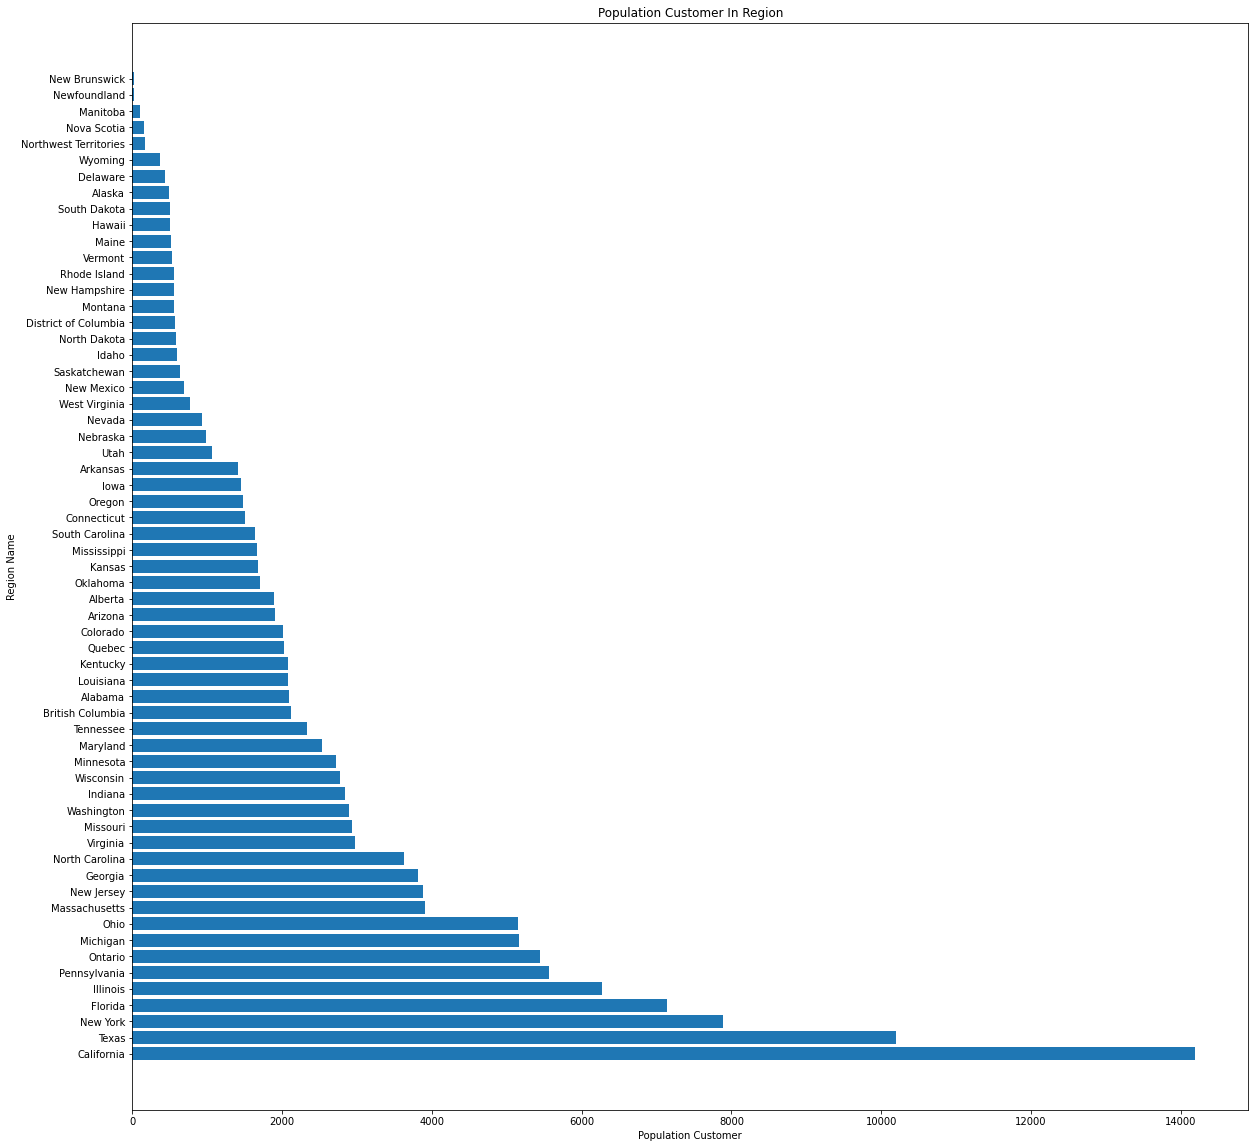

In [5]:
database_cursor.execute("""
    select region.region_name, count(customer.customer_id)
    from customer
    inner join region on region.region_id = customer.region_id
    group by region.region_id
""")
region = pd.DataFrame(data=database_cursor.fetchall(), columns=['region_name', 'number_customer'])
region = region.sort_values(by='number_customer', ascending=False)
fig, ax = plt.subplots(figsize=(20, 20))
ax.barh(region.region_name, region.number_customer)
_ = ax.set(ylabel="Region Name", xlabel="Population Customer", title="Population Customer In Region")


# grafik ini menampilkan bayak jumlah customer dalam suatu negara


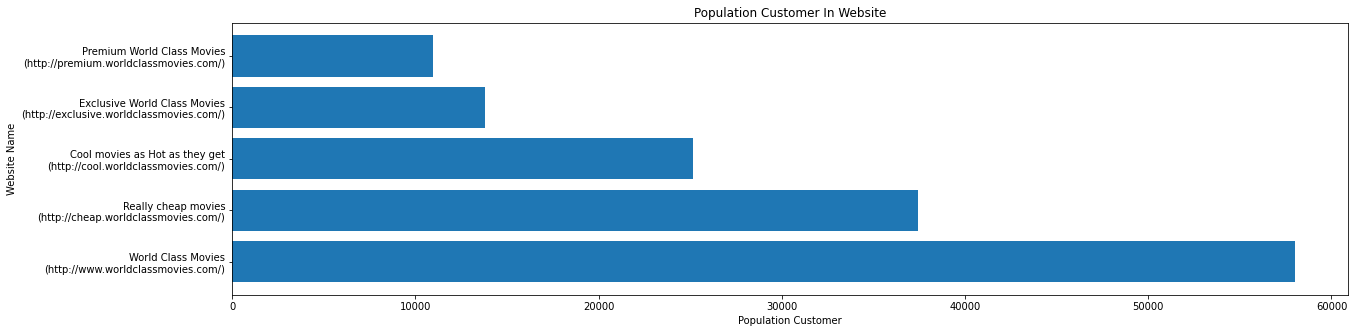

In [6]:
database_cursor.execute("""
    select concat(website.website_title, '\n(', website.website_uri ,')'), count(customer.customer_id)
    from customer
    inner join website on website.website_id = customer.website_id
    group by website.website_id
""")
website = pd.DataFrame(data=database_cursor.fetchall(), columns=['website_title', 'number_customer'])
website = website.sort_values(by='number_customer', ascending=False)
fig, ax = plt.subplots(figsize=(20, 5))
ax.barh(website.website_title, website.number_customer)
_ = ax.set(ylabel="Website Name", xlabel="Population Customer", title="Population Customer In Website",)

# grafik ini menampilkan website yang seri di aksess oleh customer

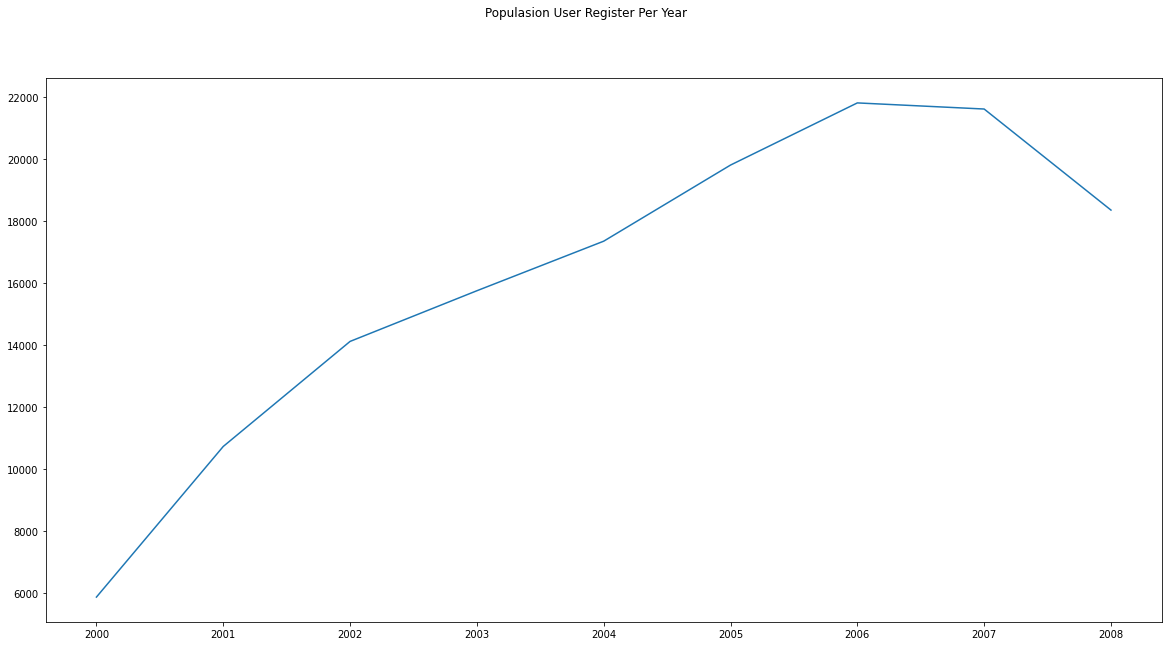

In [7]:
database_cursor.execute("""
    select date_format(date_registered, "%Y"), count(customer.customer_id)
    from customer
    group by date_format(date_registered, "%Y")
    order by date_registered asc
""")

user_registered = pd.DataFrame(data=database_cursor.fetchall(), columns=['date_registered', 'number_customer']) 

plt.figure(figsize=(20,10))
plt.plot(user_registered.date_registered, user_registered.number_customer)
plt.suptitle("Populasion User Register Per Year")
plt.show()

# grapfik ini menampilakan pupolaritas customer yang malakukan register dari tahun ke tahun


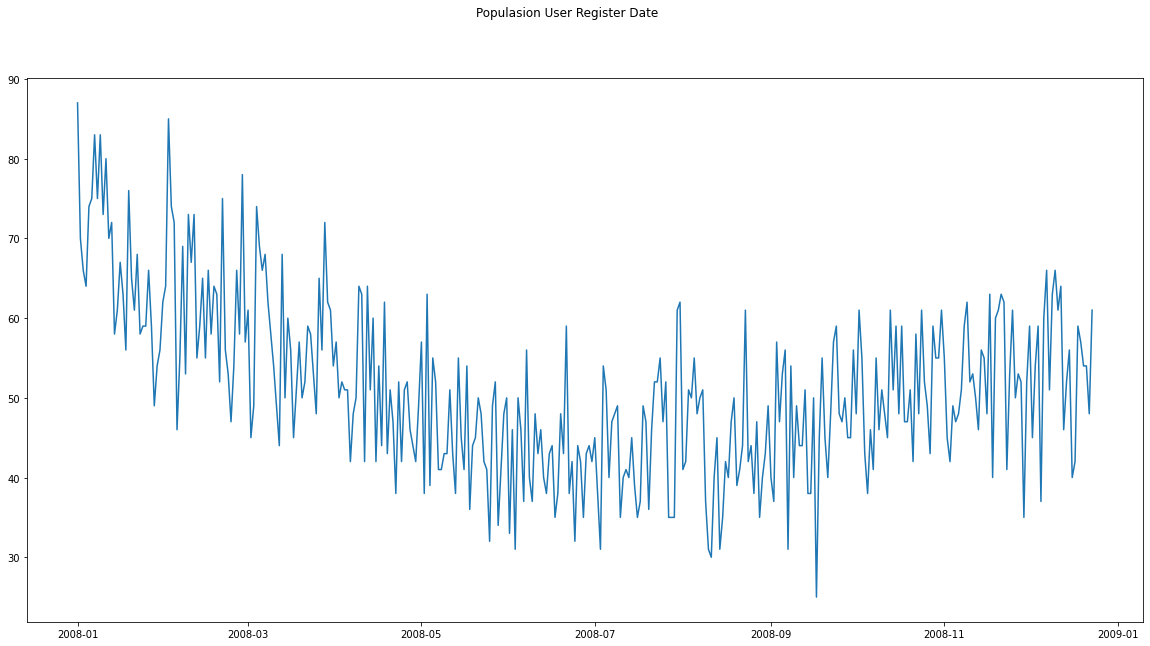

In [8]:
start_date = "2008-01-01"
end_date = "2009-12-31"
query = """
    select date_registered, count(customer.customer_id)
    from customer
    where date_registered between  "{}" and "{}" 
    group by date_registered
    order by date_registered asc
""".format(start_date, end_date)

database_cursor.execute(query)

user_registered = pd.DataFrame(data=database_cursor.fetchall(), columns=['date_registered', 'number_customer']) 

plt.figure(figsize=(20,10))
plt.plot(user_registered.date_registered, user_registered.number_customer)
plt.suptitle("Populasion User Register Date")
plt.show()

# grapfik ini menampilakan pupolaritas customer yang malakukan register berdasarkan tanggal

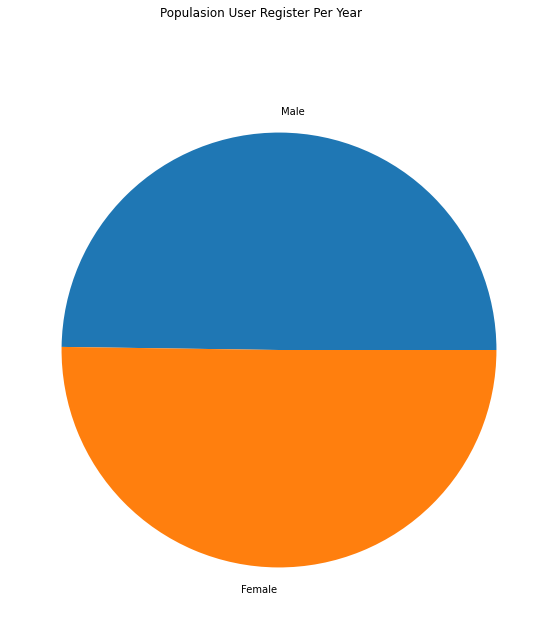

In [9]:
database_cursor.execute("""
    select  lookup_value.lookup_text, count(customer.gender_lookup) from `customer`
    inner join lookup_value on lookup_value.lookup_value_id = customer.gender_lookup
    group by customer.gender_lookup
""")

gender = pd.DataFrame(data=database_cursor.fetchall(), columns=['gender_name', 'number_customer']) 

plt.figure(figsize=(20,10))
plt.suptitle("Populasion User Register Per Year")
plt.pie(gender.number_customer, labels = gender.gender_name, )
plt.show() 

# chart ini menampilkan perbadingan antara customer pria dan wanita. disini customer wanita lebih bayak daripada customer pria

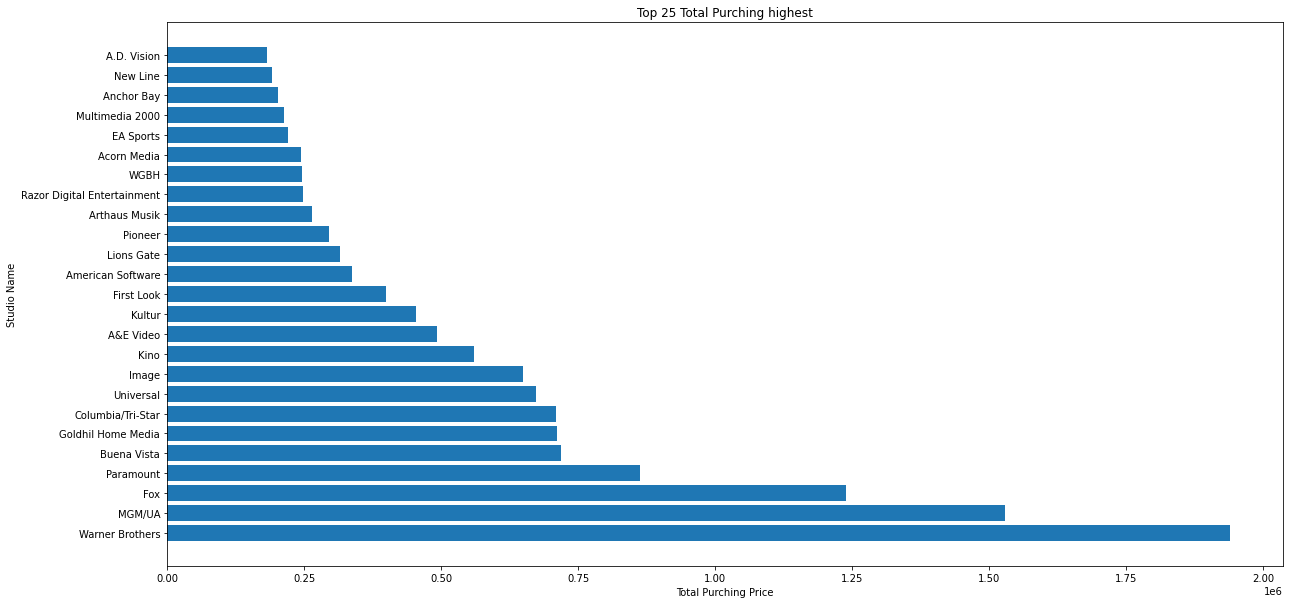

In [10]:
database_cursor.execute("""
    select dvd_release.studio, sum(customer_order_line.purchase_price) as total_purching_price from customer_order_line
    inner join dvd_release on dvd_release.dvd_release_id = customer_order_line.dvd_release_id
    group by dvd_release.studio
    order by total_purching_price desc
    limit 25
""")
studio = pd.DataFrame(data=database_cursor.fetchall(), columns=['studio_name', 'total_purching_price'])
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(studio.studio_name, studio.total_purching_price)
_ = ax.set(ylabel="Studio Name", xlabel="Total Purching Price", title="Top 25 Total Purching highest")

# grafik ini menampilkan studio teratas yang menadapatkan keuntungan tertiggi

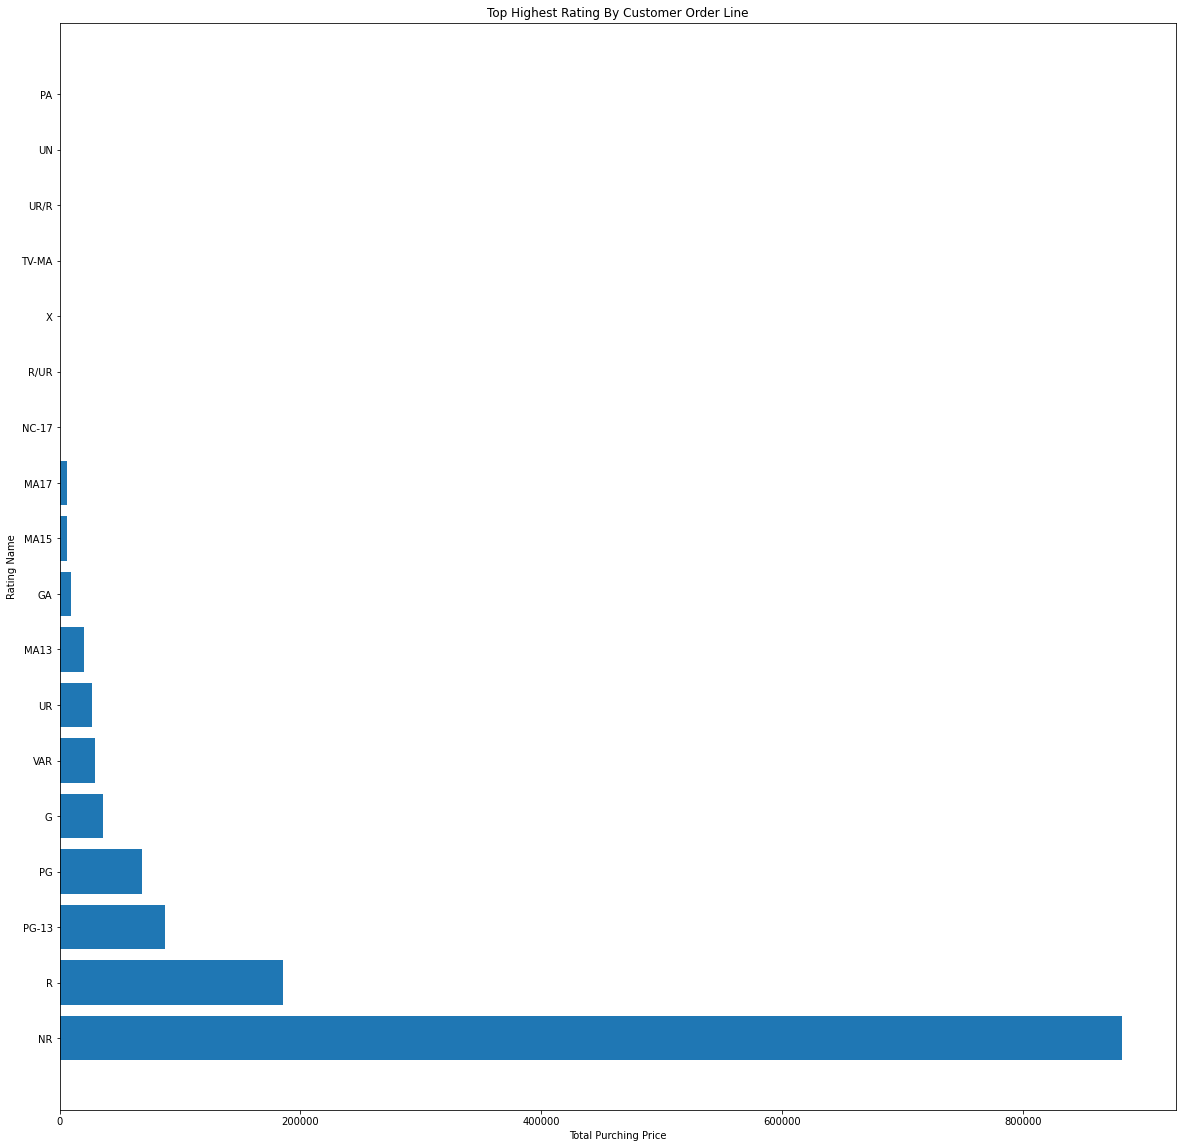

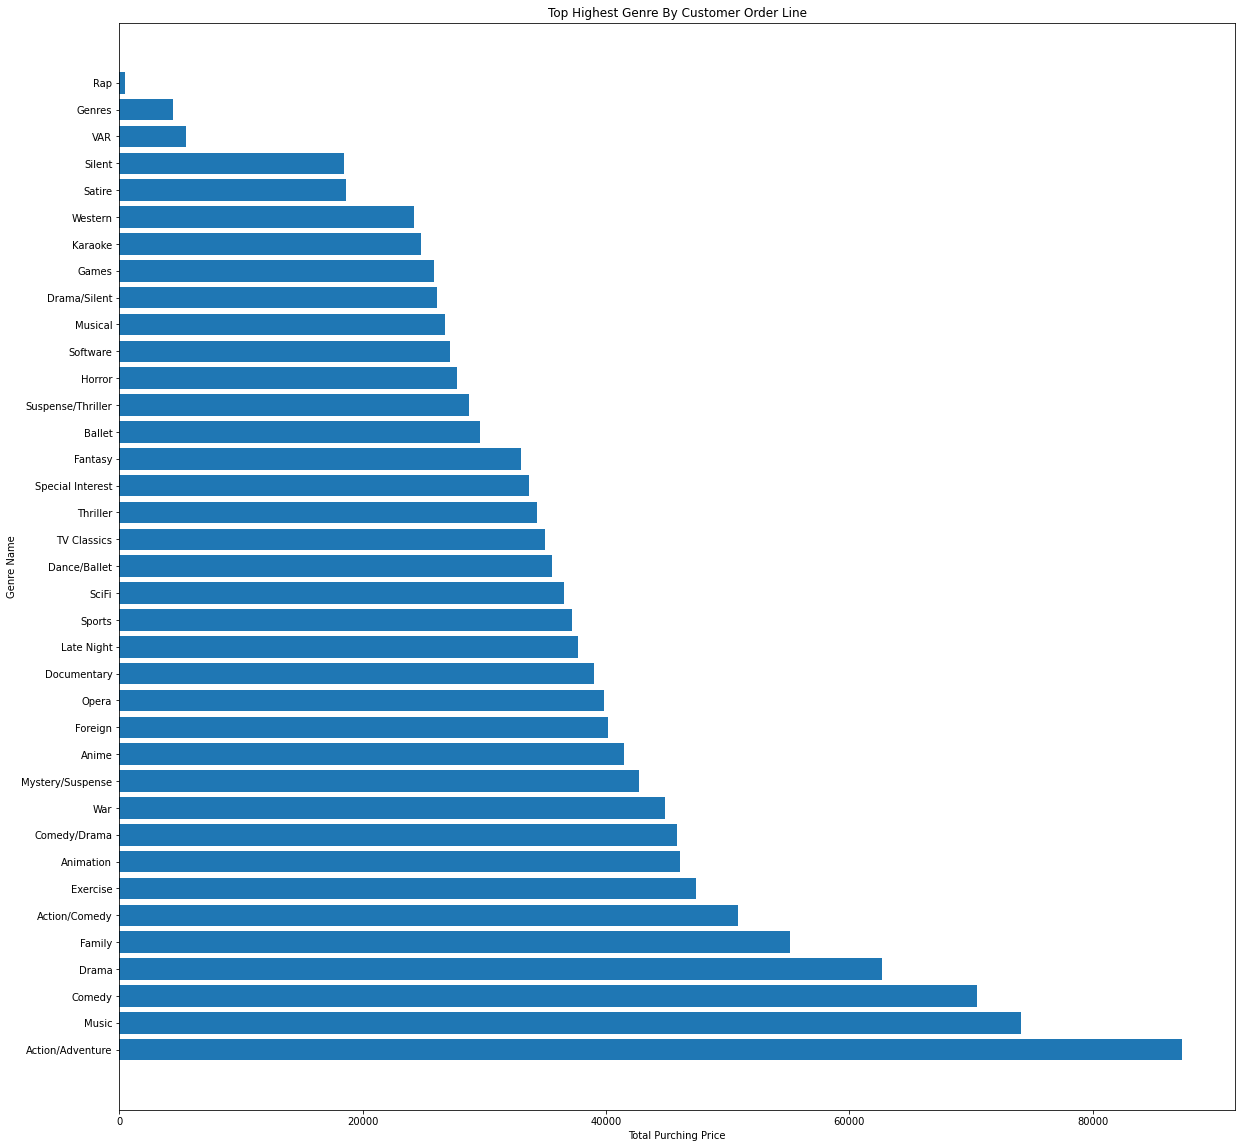

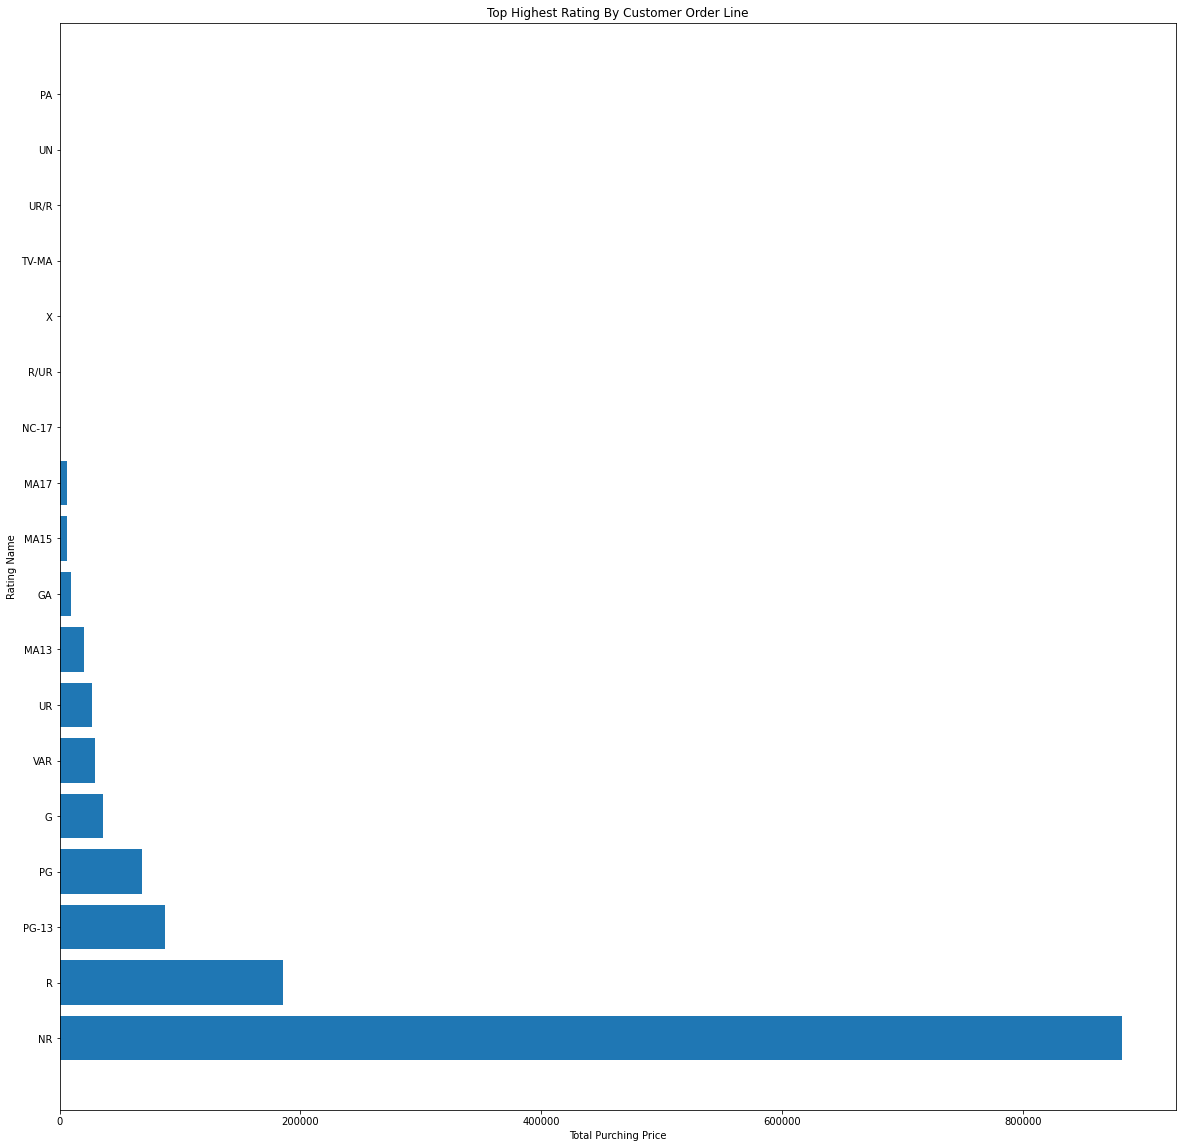

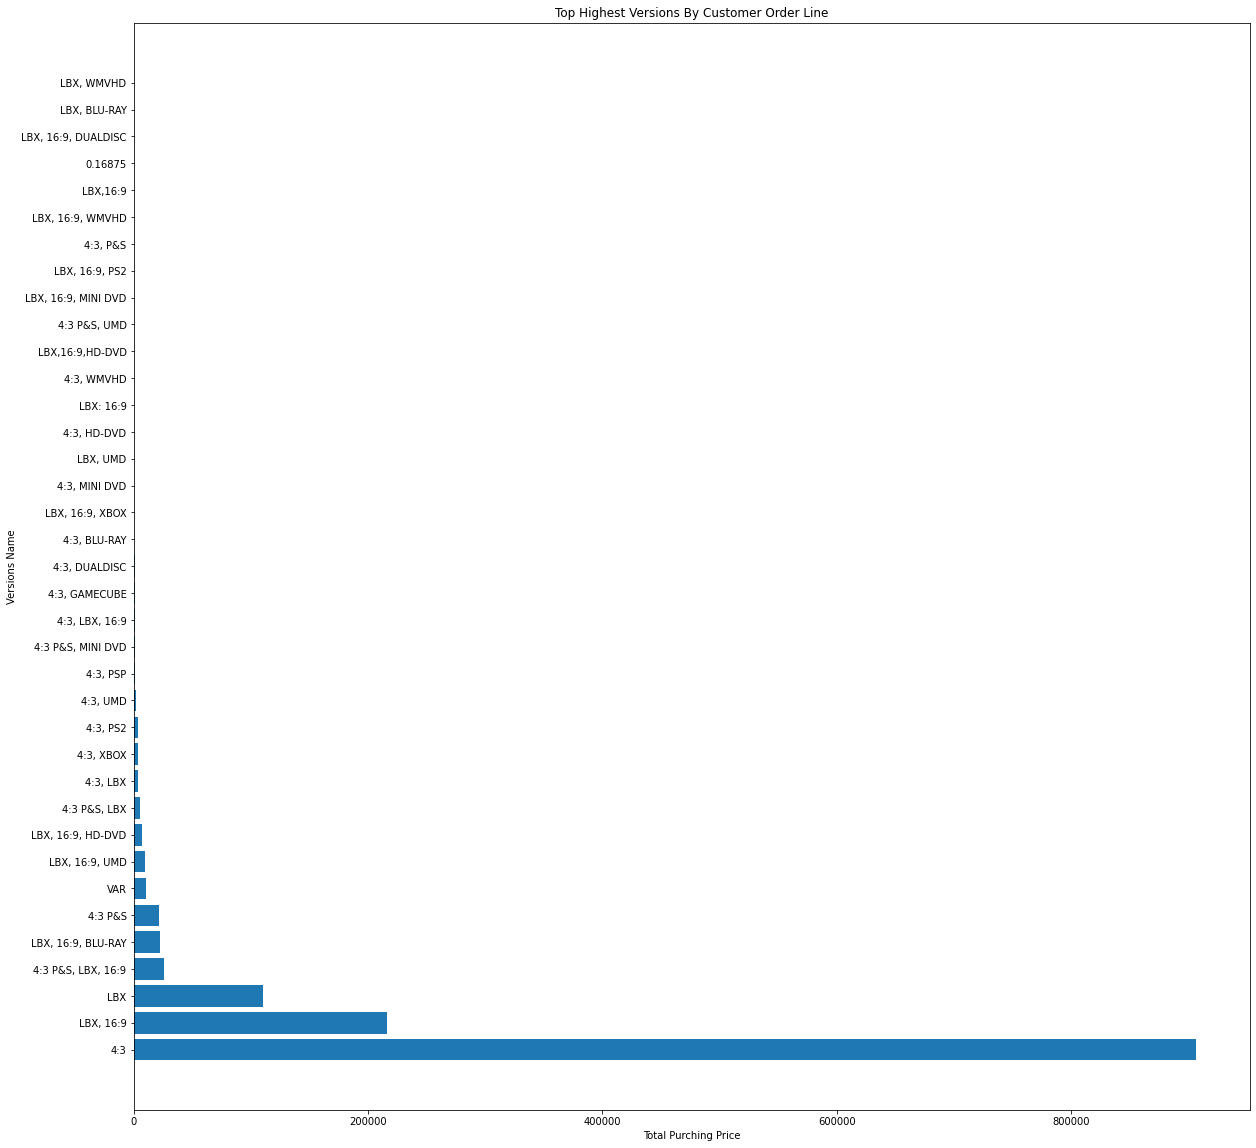

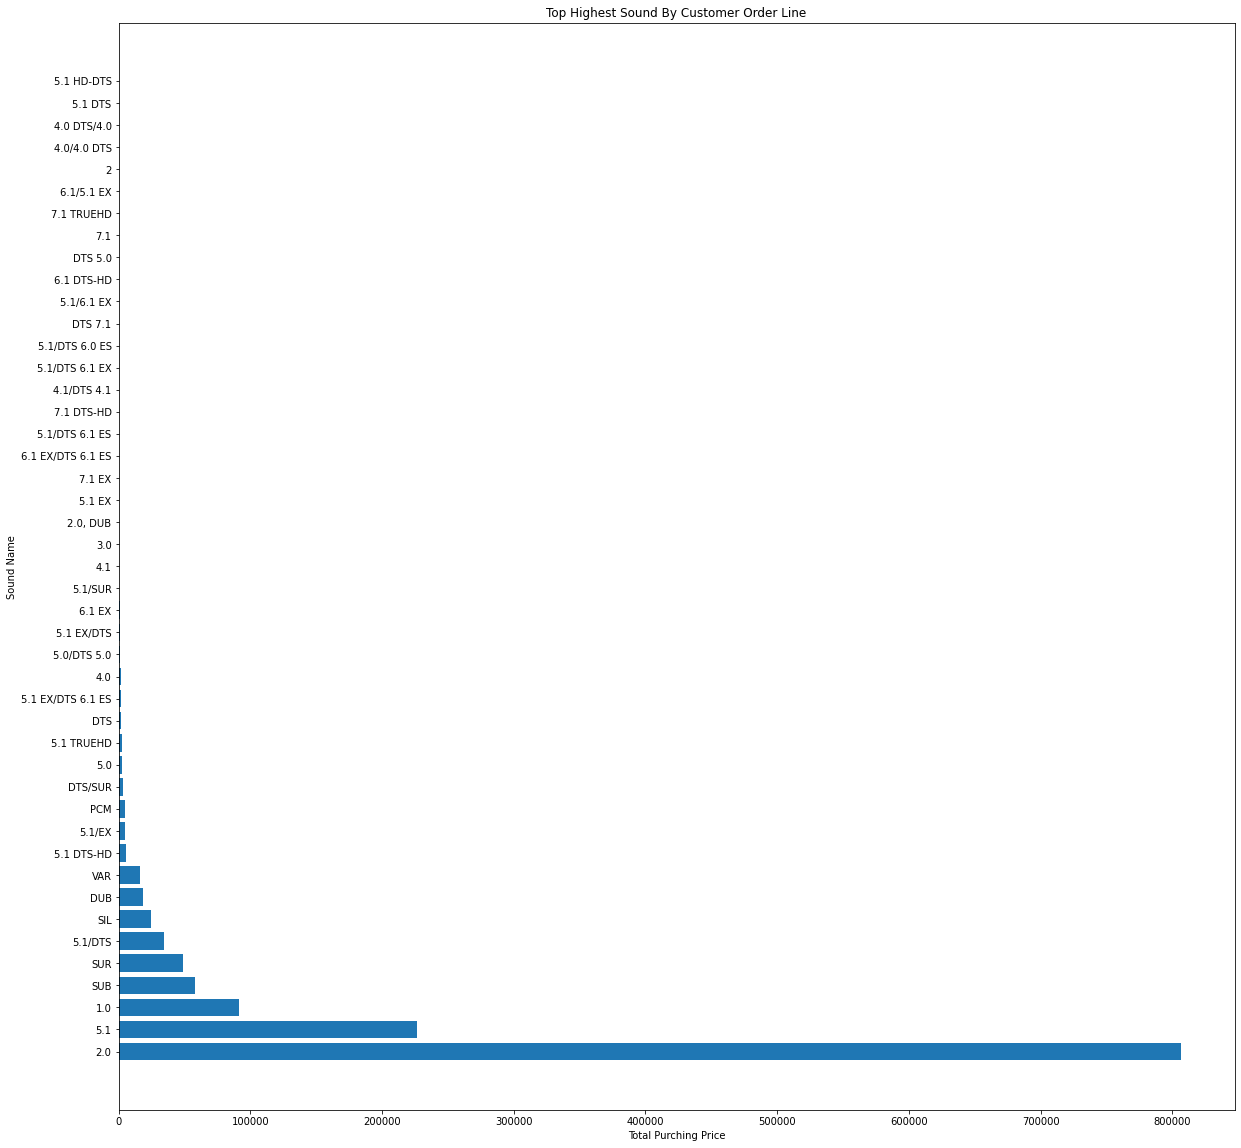

In [11]:
def call_graph_customer_order_line(field, figsize):
    database_cursor.execute("""
        select dvd_release.{columns_name} as {columns_name}_name, count(customer_order_line.customer_order_id) as number_customer from customer_order_line
        inner join dvd_release on dvd_release.dvd_release_id = customer_order_line.dvd_release_id
        group by {columns_name}
        order by number_customer desc
    """.format(columns_name=field))
    column_label_name = '{}_name'.format(field)
    data = pd.DataFrame(data=database_cursor.fetchall(), columns=[column_label_name, 'number_customer'])
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(data[column_label_name], data.number_customer)
    _ = ax.set(ylabel="{} Name".format(field).title(), xlabel="Total Purching Price", title="Top highest {} by customer order line".format(field).title())

for field in ['rating', 'genre', 'versions', 'sound']:
    # berdasarkan order line dari customer, grafil di bawah ini merupakan minta pemeblian dvd berdasarkan rating, genre, rating, versions, dan sound 
    call_graph_customer_order_line(field, (20,20))

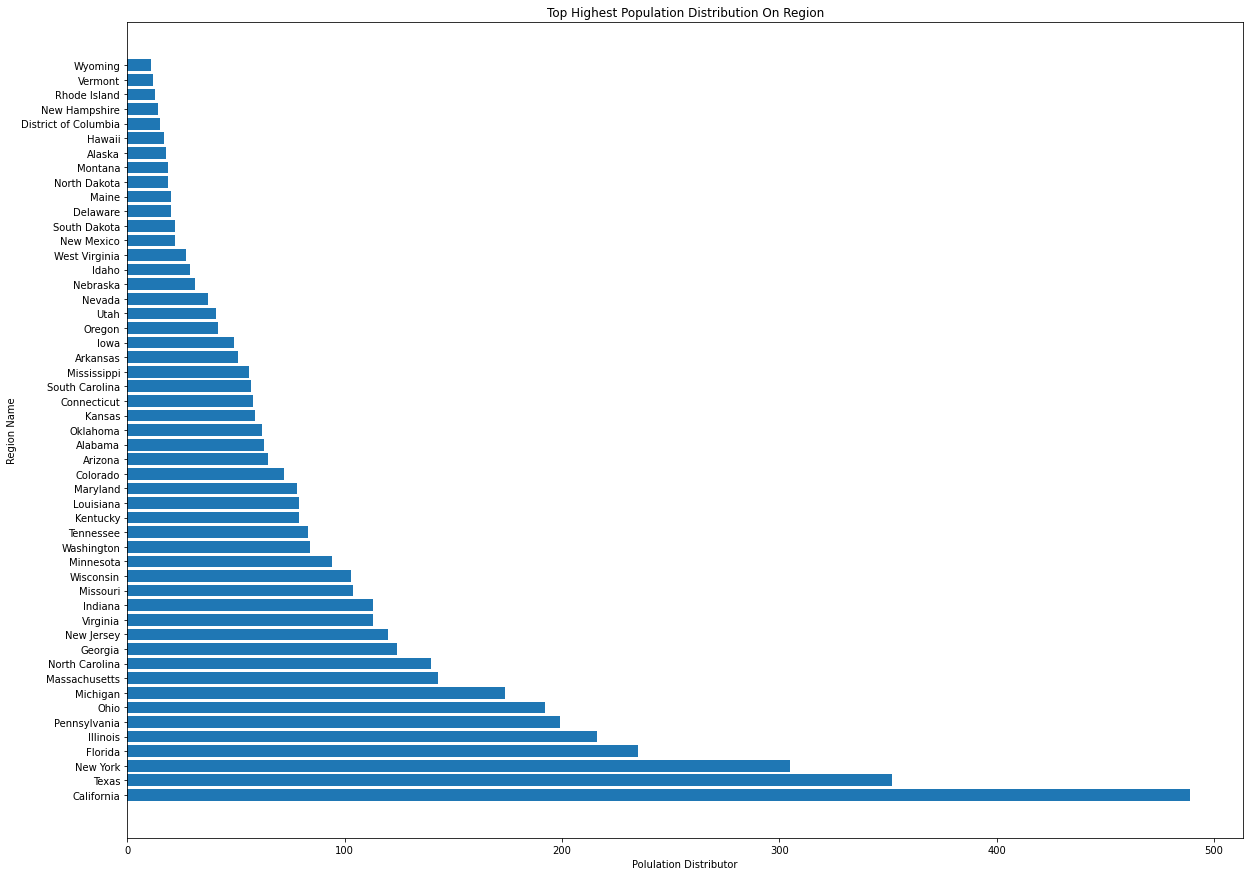

In [12]:
database_cursor.execute("""
    select region.region_name, count(region.region_name) as number_distributor
    from distributor
    inner join region on region.region_id = distributor.region_id
    group by region.region_name
    order by number_distributor desc
""")
region = pd.DataFrame(data=database_cursor.fetchall(), columns=['region_name', 'number_distributor'])
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(region.region_name, region.number_distributor)
_ = ax.set(ylabel="Region Name", xlabel="Polulation Distributor", title="Top Highest Population Distribution On Region",)

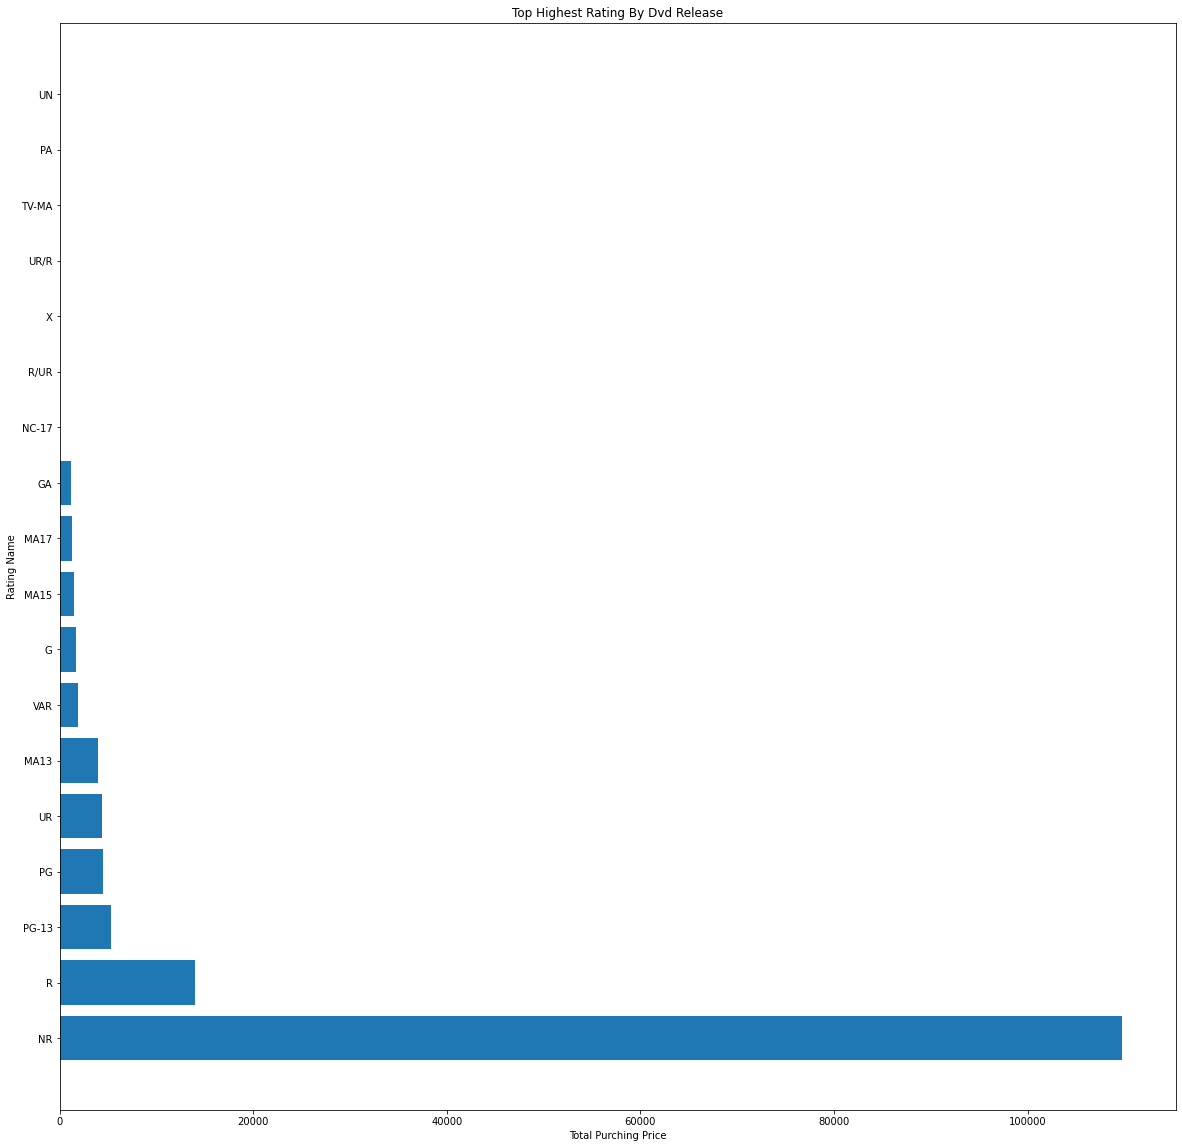

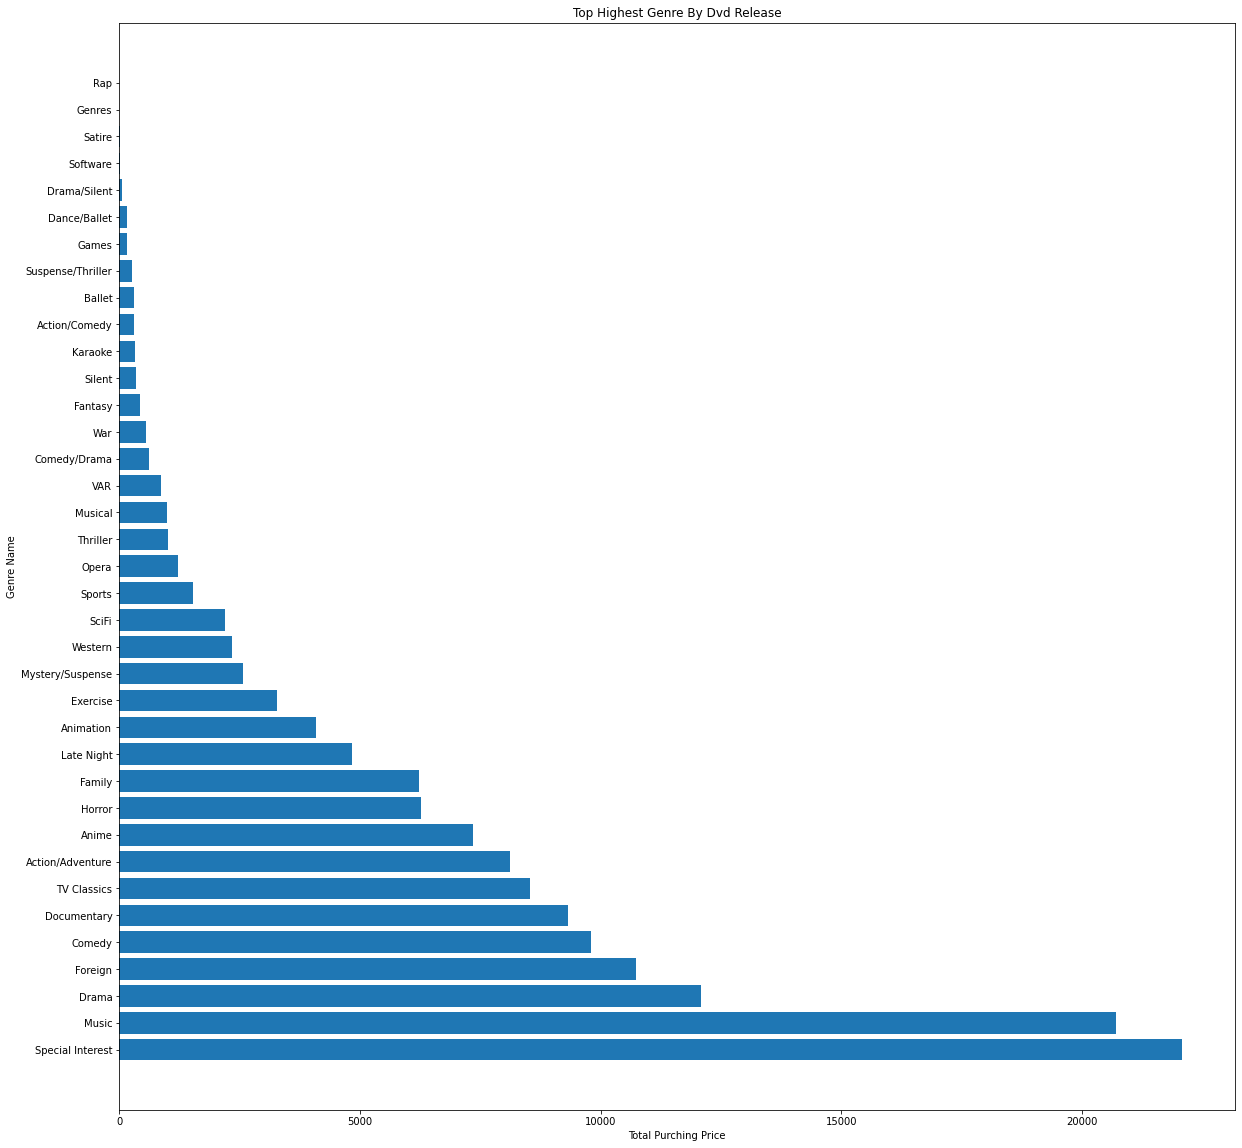

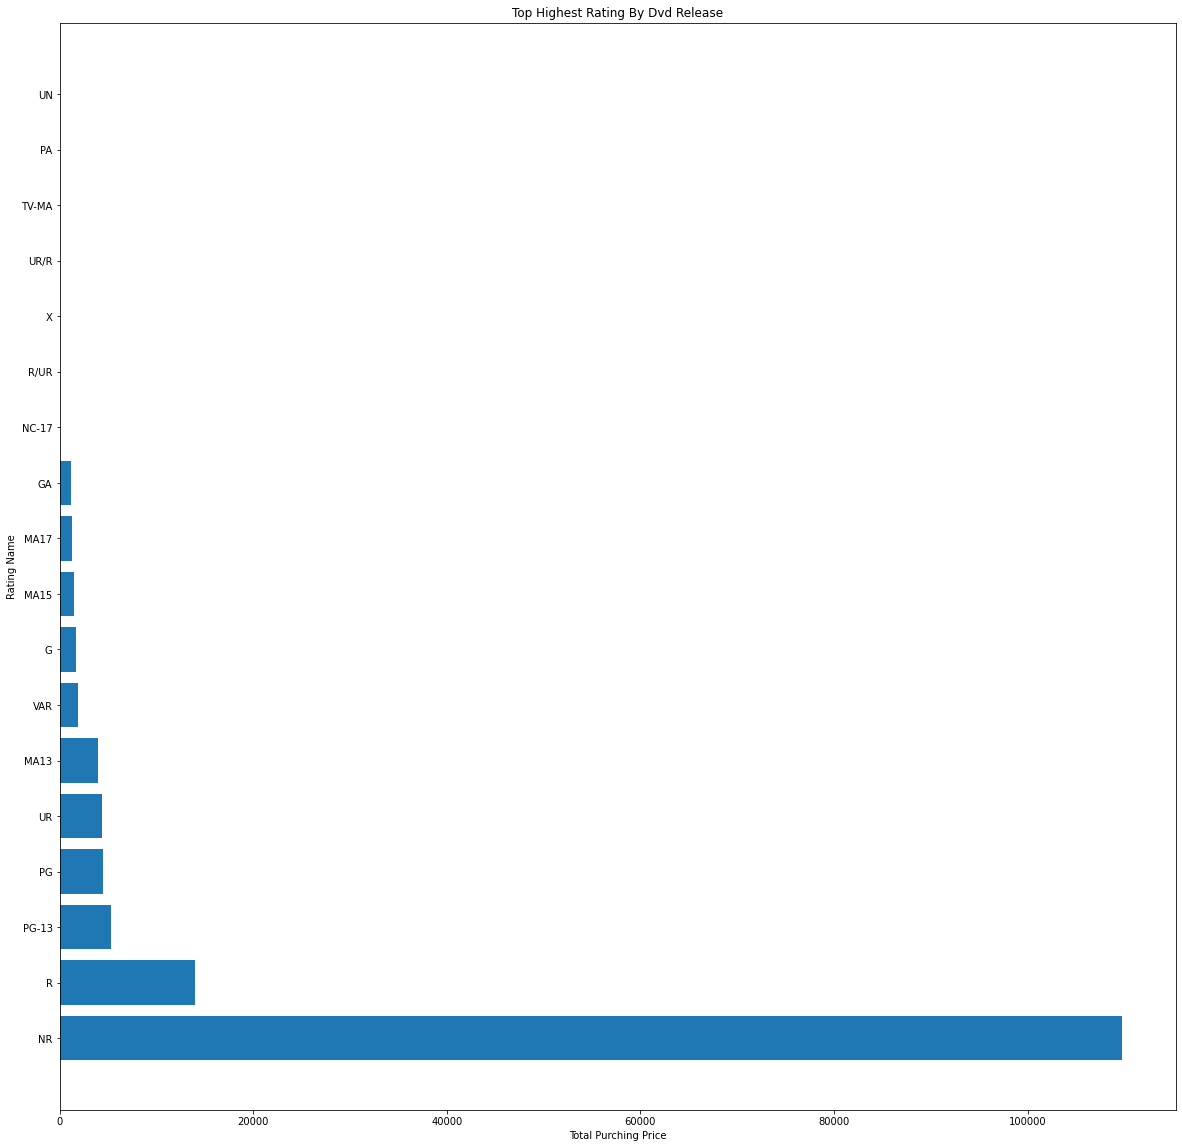

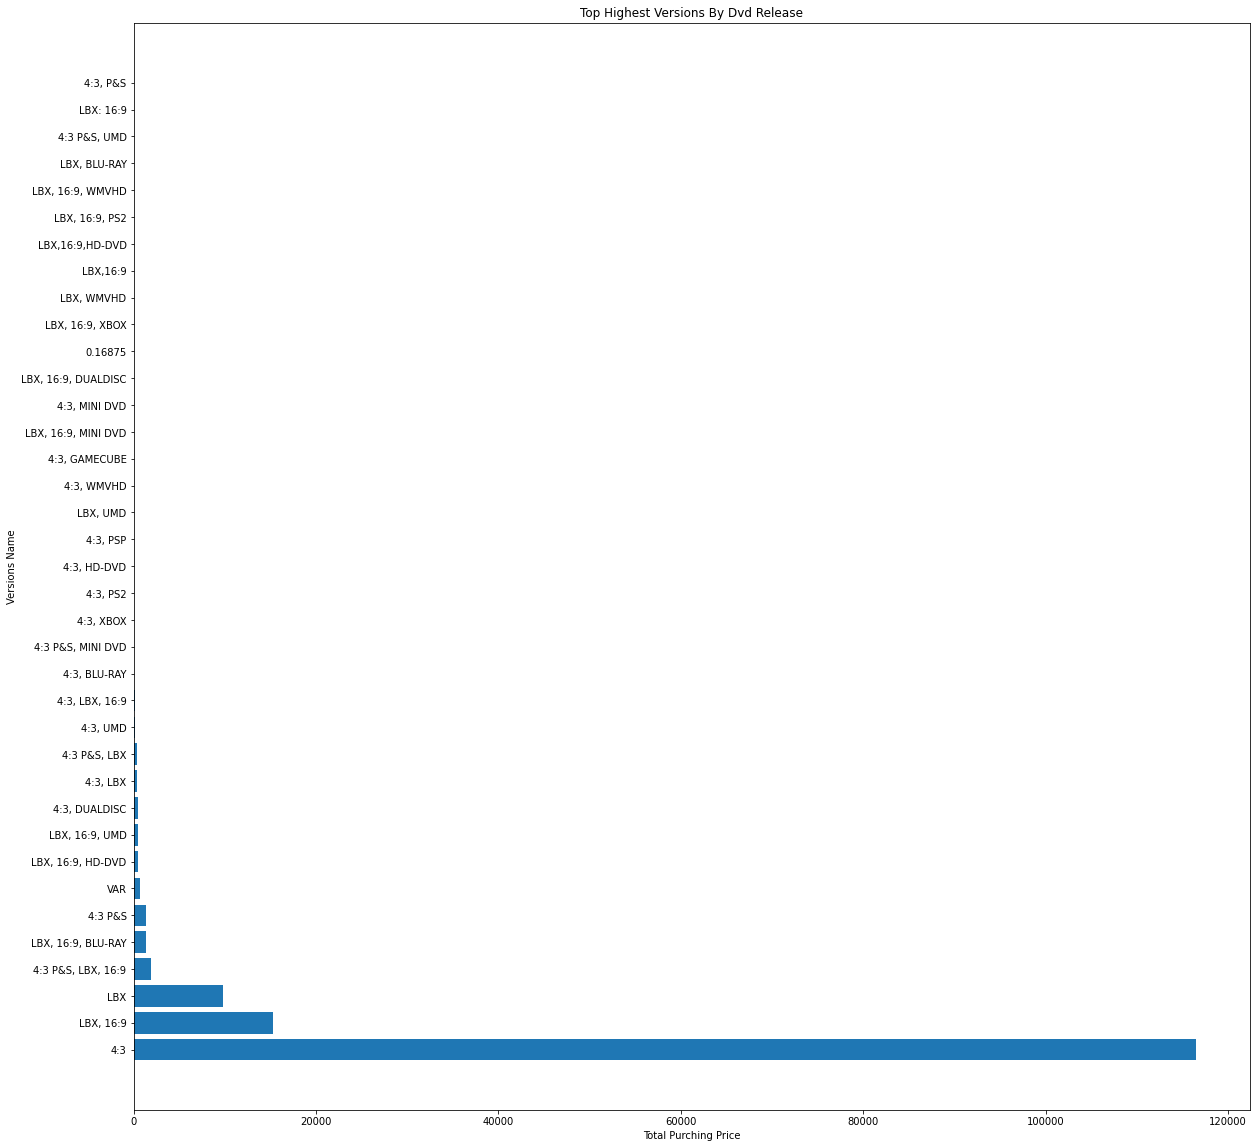

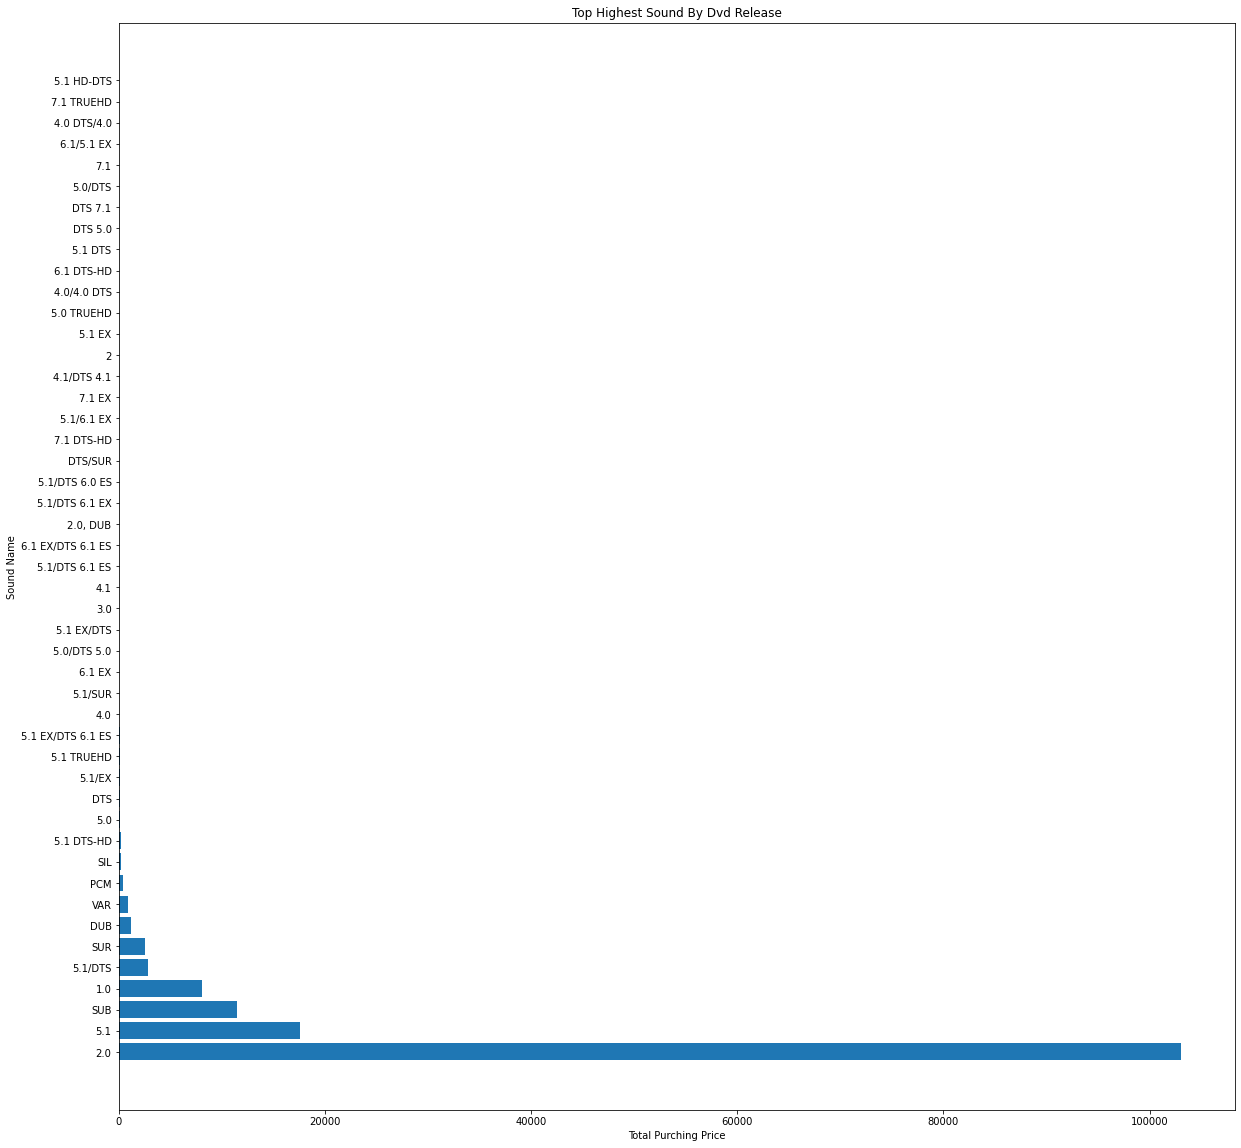

In [13]:
def call_graph_dvd_release(field, figsize):
    query = """
        select {columns_name}, count({columns_name}) as number_{columns_name} from dvd_release
        group by {columns_name}
        order by number_{columns_name} desc
    """.format(columns_name=field)
    database_cursor.execute(query)
    column_label_name = '{}_name'.format(field)
    data = pd.DataFrame(data=database_cursor.fetchall(), columns=[column_label_name, 'number_customer'])
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(data[column_label_name], data.number_customer)
    _ = ax.set(ylabel="{} Name".format(field).title(), xlabel="Total Purching Price", title="Top highest {} by dvd release".format(field).title())

for field in ['rating', 'genre', 'versions', 'sound']:
    # menampilkan reting, genre, varsions, and sournd pada dvd release 
    call_graph_dvd_release(field, (20,20))

